In [22]:
from STSAE_GCN import Yoga3DDataset, read_meta_data

In [23]:
dataset = Yoga3DDataset(read_meta_data())

In [24]:
import os
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# Define the MediaPipe Pose landmarks and their connections
# Landmark names and their corresponding indices
LANDMARK_NAMES = [
    'nose', 'left_eye_inner', 'left_eye', 'left_eye_outer', 'right_eye_inner',
    'right_eye', 'right_eye_outer', 'left_ear', 'right_ear', 'mouth_left',
    'mouth_right', 'left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow',
    'left_wrist', 'right_wrist', 'left_pinky', 'right_pinky', 'left_index',
    'right_index', 'left_thumb', 'right_thumb', 'left_hip', 'right_hip',
    'left_knee', 'right_knee', 'left_ankle', 'right_ankle', 'left_heel',
    'right_heel', 'left_foot_index', 'right_foot_index'
]

# Define connections between landmarks
POSE_CONNECTIONS = [
    (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8),
    (1, 2), (2, 3), (4, 5), (5, 6), (7, 9), (8, 10), (11, 12),
    (11, 13), (13, 15), (15, 17), (15, 19), (15, 21), (12, 14),
    (14, 16), (16, 18), (16, 20), (16, 22), (11, 23), (12, 24),
    (23, 24), (23, 25), (24, 26), (25, 27), (26, 28), (27, 29),
    (28, 30), (29, 31), (30, 32)
]

def visualize_pose_sequence(data, label, connections=POSE_CONNECTIONS, figsize=(8, 8)):
    """
    Visualize a sequence of 3D poses.

    Parameters:
        data (torch.Tensor): Tensor of shape (channels, number_of_frames, landmarks=33)
                             where channels are x, y, z coordinates.
        label (int): The label corresponding to the pose.
        connections (list of tuples): Landmark connections to draw the skeleton.
        figsize (tuple): Figure size for the plot.
    """
    # Convert tensor to numpy array
    data_np = data.numpy()
    # Assuming channels are in the order x, y, z
    x = data_np[0]  # shape: (number_of_frames, 33)
    y = data_np[1]
    z = data_np[2]
    # print(x.shape)
    num_frames = x.shape[0]

    # Create a figure and a 3D subplot
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')
    plt.title(f'Pose: {label}')

    # Function to update the plot for each frame
    def update(frame):
        ax.cla()
        ax.set_xlim3d(-1, 1)
        ax.set_ylim3d(-1, 1)
        ax.set_zlim3d(-1, 1)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        plt.title(f'Pose: {label}, Frame: {frame + 1}/{num_frames}')

        # Scatter plot of landmarks
        ax.scatter(x[frame], y[frame], z[frame], c='r', marker='.')

        # Draw connections
        for connection in connections:
            idx1, idx2 = connection
            ax.plot([x[frame, idx1], x[frame, idx2]],
                    [y[frame, idx1], y[frame, idx2]],
                    [z[frame, idx1], z[frame, idx2]], 'b-')
        # plt.show() 
        return

    # Create the animation
    anim = FuncAnimation(fig, update, frames=num_frames, interval=100)
    plt.show()
    save_dir = 'data'
    os.makedirs(save_dir, exist_ok=True)
    save_path = os.path.join(save_dir, f'test_{label}.mp4')
    anim.save(save_path)
# Example usage:
# Assuming you have an instance of Yoga3DDataset called 'dataset'
# and you have obtained an item with data, label = dataset[0]

# Visualize the pose sequence
# visualize_pose_sequence(data, label)

In [69]:
import torch
import torch.nn.functional as F
import numpy as np

def AddGaussianNoise(data, mean=0., std=0.01):
    noise = torch.randn_like(data) * std + mean
    return data + noise

def RandomRotate(data, max_angle=30):
    angle = torch.rand(1) * 2 * max_angle - max_angle  # Range: [-max_angle, max_angle] in degrees
    angle_rad = torch.deg2rad(angle)
    cos_theta = torch.cos(angle_rad)
    sin_theta = torch.sin(angle_rad)
    
    rotation_matrix = torch.tensor([
        [cos_theta, 0, sin_theta],
        [0, 1, 0],
        [-sin_theta, 0, cos_theta]
    ]).squeeze()
    
    print(data.shape)
    print(rotation_matrix.shape)
    # data = torch.matmul(rotation_matrix, data)
    data = torch.einsum('ij, jkl -> ikl', rotation_matrix, data)
    return data

def RandomScale(data, scale_range=(0.9, 1.1)):
    scale =  scale_range[0] + torch.rand(1) * (scale_range[1] - scale_range[0]) # 0.9 + 0.2 * percentage 
    return data * scale

def RandomTranslate(data, max_translate=0.1):
    translate = torch.rand(3) * 2 * max_translate - max_translate  # Range: [-max_translate, max_translate]
    return data + translate.unsqueeze(1).unsqueeze(2)

def TimeReverse(data, p=0.5):
    if torch.rand(1) < p:
        return torch.flip(data, [1])
    else:
        return data

In [70]:
def main():
    i = 0
    # print(dataset[i][1:])
    label_to_pose = {v:k for k,v in dataset.pose_to_label.items()}
    data = dataset[i][0]
    label = label_to_pose[dataset[i][1]]
    fname = dataset[i][2]
    data_g = RandomRotate(data)
    visualize_pose_sequence(data_g, label)


../official_dataset\1000.parquet
../official_dataset\1000.parquet
../official_dataset\1000.parquet
torch.Size([3, 20, 33])
torch.Size([3, 3])


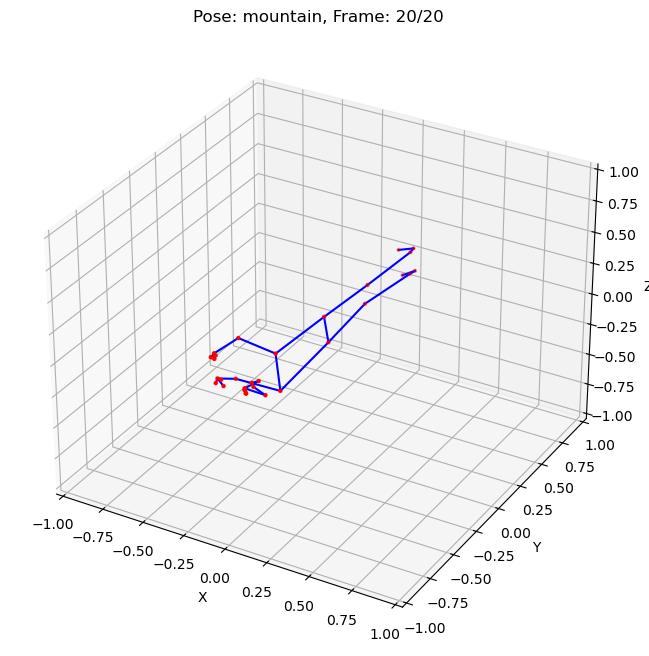

In [71]:
if __name__ == "__main__":
    main()